EDA

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv", parse_dates=["date"])
test = pd.read_csv("test.csv", parse_dates=["date"])

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())

Train shape: (913000, 4)
Test shape: (45000, 4)
        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
train['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
train['sales'].unique()

array([ 13,  11,  14,  10,  12,   9,   7,   5,  16,  18,  15,   8,   6,
        21,  20,  17,  22,  19,  24,  23,  26,  25,  27,  38,  34,  29,
        31,  30,   4,  36,  28,  33,  32,  37,  35,  43,  40,  41,  39,
        42,  50,  45,  44,  47,  53,  49,  46,  48,  51,  58,  54,  57,
        55,  52,   3,   2,   1,  59,  56,  60,  63,  69,  64,  67,  65,
        71,  61,  73,  62,  82,  78,  68,  74,  70,  87,  66,  77,  88,
        76,  75, 102,  72,  92,  86,  79,  85,  81,  90,  84,  80, 103,
        97,  96,  95,  89, 104,  94, 100,  91,  83, 106, 101,  98, 115,
        93, 111, 119,  99, 108, 110, 120, 105, 126, 109, 114, 113, 112,
       121, 107, 117, 118, 139, 124, 131, 123, 138, 134, 127, 136, 116,
       125, 122, 128, 150, 129, 135, 137, 132, 133, 145, 130, 144,   0,
       148, 141, 140, 152, 147, 169, 156, 159, 153, 142, 157, 155, 163,
       143, 154, 165, 146, 160, 158, 151, 164, 171, 161, 177, 162, 175,
       181, 168, 167, 149, 174, 170, 176, 178, 166, 173, 187, 18

In [ ]:
train.isnull().sum()
test.isnull().sum()

,0
id,0
date,0
store,0
item,0


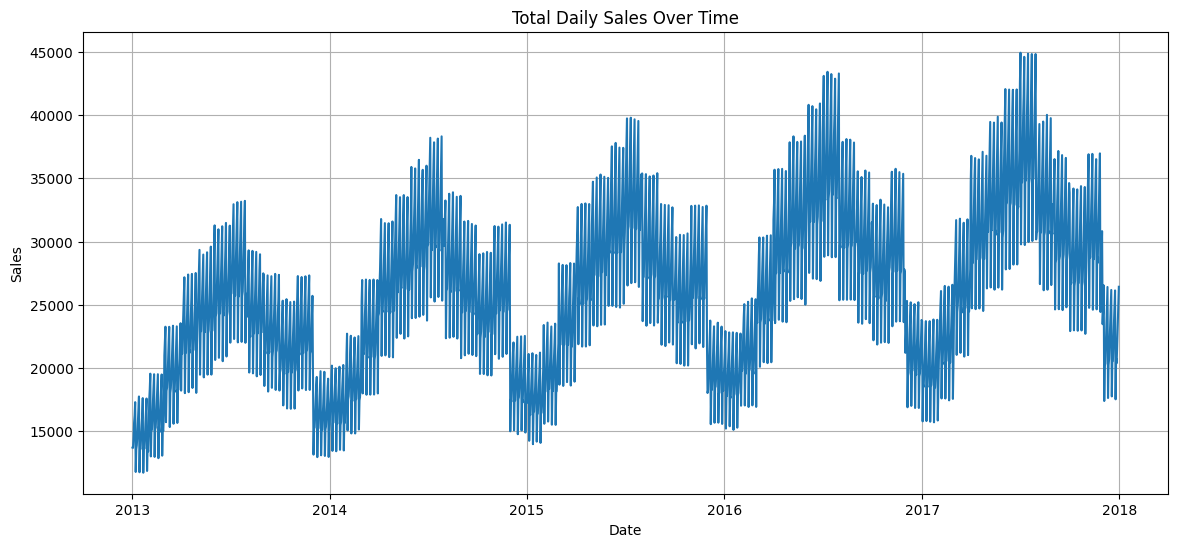

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales over time
daily_sales = train.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

/tmp/ipython-input-557368001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x="year", y="sales", palette="Blues_d")


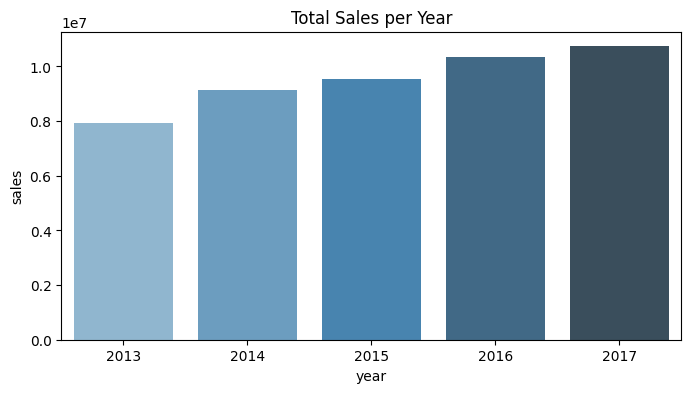

In [ ]:
# Yearly trend
train["year"] = train["date"].dt.year
yearly_sales = train.groupby("year")["sales"].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=yearly_sales, x="year", y="sales", palette="Blues_d")
plt.title("Total Sales per Year")
plt.show()

/tmp/ipython-input-2652391508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x="month", y="sales", palette="Greens_d")


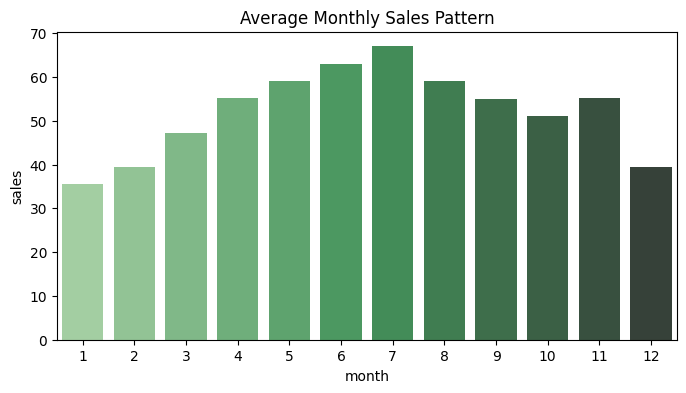

In [ ]:
# Monthly pattern
train["month"] = train["date"].dt.month
monthly_sales = train.groupby("month")["sales"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_sales, x="month", y="sales", palette="Greens_d")
plt.title("Average Monthly Sales Pattern")
plt.show()

/tmp/ipython-input-1643312830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow_sales, x="day_of_week", y="sales", palette="Oranges_d")


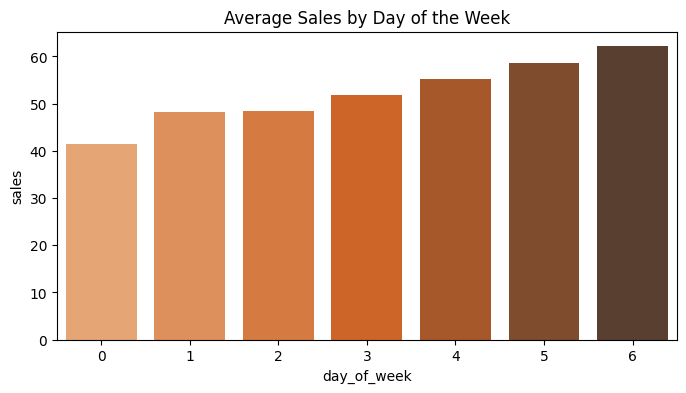

In [ ]:
# Day of week pattern
train["day_of_week"] = train["date"].dt.dayofweek
dow_sales = train.groupby("day_of_week")["sales"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=dow_sales, x="day_of_week", y="sales", palette="Oranges_d")
plt.title("Average Sales by Day of the Week")
plt.show()

In [ ]:
train.shape

(913000, 7)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         913000 non-null  datetime64[ns]
 1   store        913000 non-null  int64         
 2   item         913000 non-null  int64         
 3   sales        913000 non-null  int64         
 4   year         913000 non-null  int32         
 5   month        913000 non-null  int32         
 6   day_of_week  913000 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 38.3 MB


Feature Engineering

In [ ]:
train["day_of_week"] = train["date"].dt.dayofweek
train["month"] = train["date"].dt.month
train["year"] = train["date"].dt.year
train["day_of_year"] = train["date"].dt.dayofyear
train["week_of_year"] = train["date"].dt.isocalendar().week.astype(int)
train["is_weekend"] = train["day_of_week"].isin([5, 6]).astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          913000 non-null  datetime64[ns]
 1   store         913000 non-null  int64         
 2   item          913000 non-null  int64         
 3   sales         913000 non-null  int64         
 4   year          913000 non-null  int32         
 5   month         913000 non-null  int32         
 6   day_of_week   913000 non-null  int32         
 7   day_of_year   913000 non-null  int32         
 8   week_of_year  913000 non-null  int64         
 9   is_weekend    913000 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(5)
memory usage: 55.7 MB


In [ ]:
train.head()

,date,store,item,sales,year,month,day_of_week,day_of_year,week_of_year,is_weekend
0,2013-01-01,1,1,13,2013,1,1,1,1,0
1,2013-01-02,1,1,11,2013,1,2,2,1,0
2,2013-01-03,1,1,14,2013,1,3,3,1,0
3,2013-01-04,1,1,13,2013,1,4,4,1,0
4,2013-01-05,1,1,10,2013,1,5,5,1,1


In [ ]:
test["day_of_week"] = test["date"].dt.dayofweek
test["month"] = test["date"].dt.month
test["year"] = test["date"].dt.year
test["day_of_year"] = test["date"].dt.dayofyear
test["week_of_year"] = test["date"].dt.isocalendar().week.astype(int)
test["is_weekend"] = test["day_of_week"].isin([5, 6]).astype(int)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            45000 non-null  int64         
 1   date          45000 non-null  datetime64[ns]
 2   store         45000 non-null  int64         
 3   item          45000 non-null  int64         
 4   day_of_week   45000 non-null  int32         
 5   month         45000 non-null  int32         
 6   year          45000 non-null  int32         
 7   day_of_year   45000 non-null  int32         
 8   week_of_year  45000 non-null  int64         
 9   is_weekend    45000 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(5)
memory usage: 2.7 MB


Modeling

In [ ]:
train_data = train[train["date"] < "2017-01-01"]
val_data = train[train["date"] >= "2017-01-01"]

In [ ]:
features = ["day_of_week", "month", "year", "day_of_year", "week_of_year", "is_weekend"]

X_train = train_data[features]
y_train = train_data["sales"]

X_val = val_data[features]
y_val = val_data["sales"]

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
val_pred = lr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Linear Regression Baseline RMSE: {rmse_lr:.2f}")

Linear Regression Baseline RMSE: 30.70


In [ ]:
train = train.sort_values(by=["store", "item", "date"])


train["lag_7"] = train.groupby(["store", "item"])["sales"].shift(7)
train["lag_30"] = train.groupby(["store", "item"])["sales"].shift(30)
train["lag_90"] = train.groupby(["store", "item"])["sales"].shift(90)


train["rolling_mean_30"] = train.groupby(["store", "item"])["sales"].transform(
    lambda x: x.shift(1).rolling(window=30).mean()
)

train_model = train.dropna(subset=["lag_7", "lag_30", "lag_90", "rolling_mean_30"])

In [ ]:
train_model.shape

(868000, 14)

In [ ]:
train_data = train_model[train_model["date"] < "2017-01-01"]
val_data = train_model[train_model["date"] >= "2017-01-01"]

features = [
    "day_of_week", "month", "year", "day_of_year", "week_of_year", "is_weekend",
    "lag_7", "lag_30", "lag_90", "rolling_mean_30"
]

X_train = train_data[features]
y_train = train_data["sales"]

X_val = val_data[features]
y_val = val_data["sales"]

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist"
)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
val_pred = model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, val_pred))
print(f'XGBoost RMSE: {rmse_xgb:.2f}')

XGBoost RMSE: 7.90


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

subset = train_model[(train_model['store'] == 1) & (train_model['item'] == 1)]

X = subset[features]
y = subset['sales']



tscv = TimeSeriesSplit(n_splits=5)
fold = 1
rmse_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

    print(f"Fold {fold} RMSE: {rmse:.2f}")
    fold += 1

print("\nAverage RMSE across folds:", np.mean(rmse_scores))


Fold 1 RMSE: 5.52
Fold 2 RMSE: 5.67
Fold 3 RMSE: 5.08
Fold 4 RMSE: 5.05
Fold 5 RMSE: 5.45

Average RMSE across folds: 5.354385594270827


In [ ]:
full = pd.concat([train, test], sort=False).sort_values(["store", "item", "date"])

for lag in [7, 30, 90]:
    full[f"lag_{lag}"] = full.groupby(["store", "item"])["sales"].shift(lag)

full["rolling_mean_30"] = full.groupby(["store", "item"])["sales"] \
                              .transform(lambda x: x.shift(1).rolling(30).mean())

train_full = full[~full["sales"].isna()].copy()
test_full  = full[full["sales"].isna()].copy()


train_full = train_full.dropna(subset=features)

X_train = train_full[features]
y_train = train_full["sales"]
X_test  = test_full[features]

In [ ]:
final_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist"
)

final_model.fit(X_train, y_train)

test_pred = final_model.predict(X_test)
test_pred = np.maximum(test_pred, 0)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission["sales"] = test_pred
submission.to_csv("submission.csv", index=False)
print("submission.csv saved!")

submission.csv saved!
